1. 강수량이 에너지 생산 변동성에 미치는 영향
2. 강수량 증가 시점 이후의 지연 효과 분석 -> 강수량 발생 이후 일정 시차를 두고 에너지 생산량에 변화가 나타나는지

아이디어
주제 : 장마철 태양광 발전 공백 분석: 수도권 지역 ESS 최소 필요 용량 산정

1. 문제정의
- 장마철 태양광 발전량은 맑은 날 대비 최소 30%에서 최대 70%까지 감소할 수 있으며, 이는 높은 습도와 구름으로 인한 일조량 부족, 패널 오염(먼지/이물질), 그리고 폭염 시 온도 상승 효과가 복합적으로 작용

📌 초점
장마철 = 태양광 발전 급감 → ESS로 보완 → 필요 용량 계산

2. 분석 질문 만들기
- 장마철 태양광 발전량이 평시 대비 얼마나 감소하나?
- 연속으로 발전량이 낮은 기간(공백기)은 며칠인가?
- 이 기간을 버티려면 ESS 용량이 얼마나 필요한가?
- 지역별로 필요 용량이 다른 이유는?

3. 데이터 범위

- 지역: 수도권 (서울, 인천, 경기)
- 기간: 2019~2025년 67월 (장마철 강수량 데이터, 태양광 발전 생산량)
- 비교: 비장마철(4~5월) 대조군

In [34]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (그래프에서 한글 깨짐 방지)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

장마철 강수량 데이터(2020~2025 6~7월)

In [ ]:
# 데이터 시작 줄 자동으로 찾기
import pandas as pd

file_path = 'seoul_weather_6~7.csv'

# 데이터 시작 행 찾기
start_row = None
with open(file_path, encoding='cp949') as f:
    for i, line in enumerate(f):
        if '지점번호' in line:
            start_row = i
            break

start_row

# 그 줄부터 CSV 읽기
weather_df = pd.read_csv(
    file_path,
    encoding='cp949',
    skiprows=start_row,
    engine='python'   # ← 중요 (형식 깨진 CSV 필수)
)

# 컬럼명 정리
weather_df.columns = weather_df.columns.str.strip().str.replace('"', '')
weather_df



,지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자,Unnamed: 8
0,108,서울,2020-06,139.6,64.7,2020-06-30,15.9,2020-06-30,NaN
1,108,서울,2020-07,270.4,103.1,2020-07-23,27.1,2020-07-29,NaN
2,108,서울,2021-06,104.6,38.2,2021-06-27,37.7,2021-06-27,NaN
3,108,서울,2021-07,168.3,67.4,2021-07-19,65.7,2021-07-19,NaN
4,108,서울,2022-06,393.8,176.2,2022-06-30,34.4,2022-06-23,NaN
5,108,서울,2022-07,252.3,114.5,2022-07-13,33.8,2022-07-16,NaN
6,108,서울,2023-06,195.6,63.8,2023-06-29,33.8,2023-06-29,NaN
7,108,서울,2023-07,459.9,91.6,2023-07-13,35.0,2023-07-13,NaN
8,108,서울,2024-06,115.9,38.3,2024-06-29,20.7,2024-06-29,NaN
9,108,서울,2024-07,557.3,128.8,2024-07-18,63.3,2024-07-17,NaN


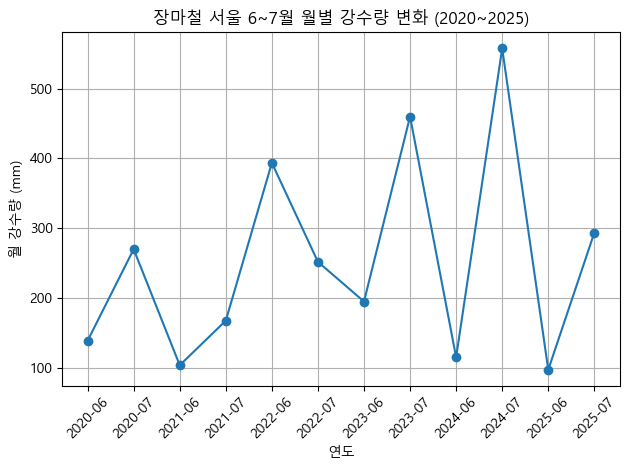

In [ ]:
# 그래프 그리기
plt.figure()
plt.plot(weather_df['일시'], weather_df['강수량(mm)'], marker='o')

plt.xlabel('연도')
plt.ylabel('월 강수량 (mm)')
plt.title('장마철 서울 6~7월 월별 강수량 변화 (2020~2025)')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

비장마철 강수량 데이터 (2020~2025 4~5월)

In [45]:
file_path = 'seoul_weather_4~5.csv'

start_row = None
with open(file_path, encoding='cp949') as f:
    for i, line in enumerate(f):
        if '지점번호' in line:
            start_row = i
            break

weather_df = pd.read_csv(
    file_path,
    encoding='cp949',
    skiprows=start_row,
    engine='python'
)

weather_df.columns = weather_df.columns.str.strip().str.replace('"', '')
weather_df

,지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자,Unnamed: 8
0,108,서울,2020-04,16.9,10.3,2020-04-19,3.9,2020-04-17,NaN
1,108,서울,2020-05,112.4,29.8,2020-05-18,19.8,2020-05-18,NaN
2,108,서울,2021-04,124.1,56.2,2021-04-03,11.5,2021-04-03,NaN
3,108,서울,2021-05,183.1,66.9,2021-05-16,11.3,2021-05-30,NaN
4,108,서울,2022-04,20.4,15.5,2022-04-29,4.0,2022-04-29,NaN
5,108,서울,2022-05,7.5,3.5,2022-05-25,2.9,2022-05-25,NaN
6,108,서울,2023-04,96.9,50.3,2023-04-05,9.0,2023-04-05,NaN
7,108,서울,2023-05,155.6,47.5,2023-05-06,9.3,2023-05-06,NaN
8,108,서울,2024-04,33.2,17.1,2024-04-15,8.0,2024-04-15,NaN
9,108,서울,2024-05,125.1,48.3,2024-05-05,8.1,2024-05-05,NaN


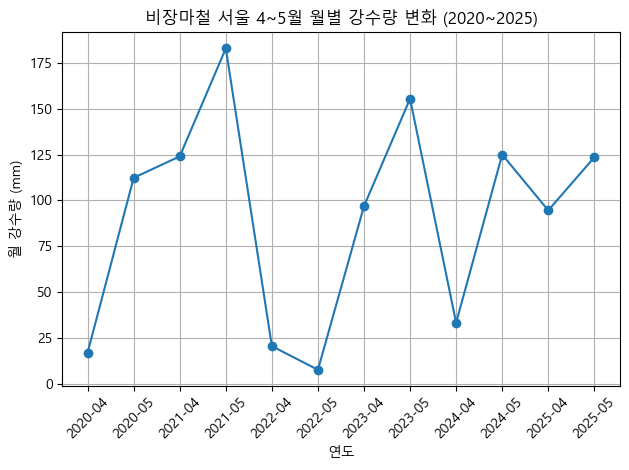

In [46]:
file_path = 'seoul_weather_4~5.csv'
plt.figure()
plt.plot(weather_df['일시'], weather_df['강수량(mm)'], marker='o')

plt.xlabel('연도')
plt.ylabel('월 강수량 (mm)')
plt.title('비장마철 서울 4~5월 월별 강수량 변화 (2020~2025)')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

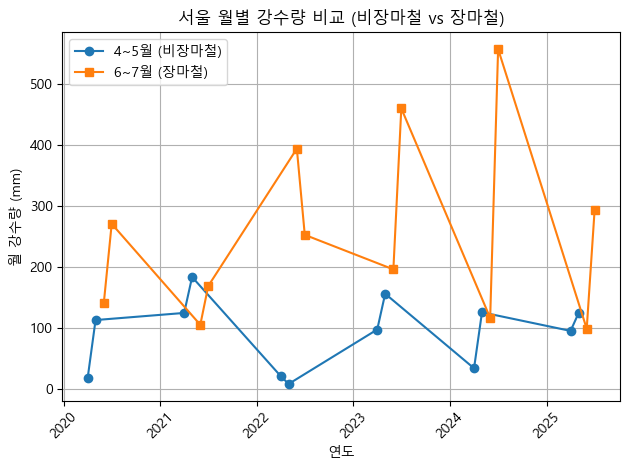

In [ ]:
# 비장마철 장마철 두 그래프 비교
import pandas as pd

def load_weather(file_path):
    start_row = None
    with open(file_path, encoding='cp949') as f:
        for i, line in enumerate(f):
            if '지점번호' in line:
                start_row = i
                break

    df = pd.read_csv(
        file_path,
        encoding='cp949',
        skiprows=start_row,
        engine='python'
    )

    # 컬럼 정리
    df.columns = df.columns.str.strip().str.replace('"', '')

    # 문자열 정리 후 날짜 변환 (format 지정 ❌)
    df['일시'] = df['일시'].astype(str).str.strip()
    df['일시'] = pd.to_datetime(df['일시'], errors='coerce')

    # 날짜 기준 정렬
    df = df.sort_values('일시')

    return df[['일시', '강수량(mm)']]

df_45 = load_weather('seoul_weather_4~5.csv')
df_67 = load_weather('seoul_weather_6~7.csv')


import matplotlib.pyplot as plt

plt.figure()

plt.plot(df_45['일시'], df_45['강수량(mm)'], marker='o', label='4~5월 (비장마철)')
plt.plot(df_67['일시'], df_67['강수량(mm)'], marker='s', label='6~7월 (장마철)')

plt.xlabel('연도')
plt.ylabel('월 강수량 (mm)')
plt.title('서울 월별 강수량 비교 (비장마철 vs 장마철)')

plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





### 1. 장마철 평균 일 발전량

예상 발전량(kWh/day) = 일사량(kWh/m^2) * 모듈 면적(m^2) * 발전 효율(%) * 손실 계수(일반적으로 0.8~0.9)

장마철 태양광 발전량 계산 방법
1단계: 설치 용량 및 위치 확인
태양광 패널의 정격 용량(kW)과 설치 위치(위도, 지역별 일조량)를 확인합니다.
2단계: 장마철 일조량(PSH) 적용
장마철에는 맑은 날보다 최대 일조 시간(PSH)이 크게 줄어듭니다. 한국기상청 등 공식 자료에서 월별 PSH를 확인해 평균값을 적용합니다.
3단계: 발전량 산출 공식 적용
발전량(kWh) = 패널 용량(kW) × 장마철 PSH × 3.5(1kW당 하루 평균 발전량, 3.5시간 기준).